<h1>Where should I open my resteraunt in NY City??? </h1>

***
- **How shall I approach this???** <br>
    1. Load data of NY - past lab data <br>
    2. Identify neighborhoods on map and cluster together - k means clustering <br>
        * What are the different areas that can be identified? <br> 
    3. Identify the favorite resteraunts in all of NYC <br>
        * What is the general food choice of NYC?
    4. Identify top 5 resteraunts in each neighborhood and cluster together <br> 
        * Where are the resteraunts located in each neighborhood - focus on my resteraunt
    5. Decide where you think you should open your resteraunt <br>
        * After looking at the nighborhoods and seeing:<br>
            * the overall food choice<br>
            * where each area is<br>
            * the favorites of each area and the frequencies of each resteraunt<br>
            * Where would yours go best?<br>
***

<h2>Lets get the basics</h2>

In [130]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


#### let's download all the dependencies that we will need

In [131]:
import numpy as np # library to handle data in a vectorized manner
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Load and explore the data

In [132]:
import wget
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
myfile = wget.download(url)
print('Data downloaded!')

Data downloaded!


In [133]:
#### Load and explore the data

In [134]:
with open(myfile) as json_data:
    newyork_data = json.load(json_data)

In [135]:
neighborhoods_data = newyork_data['features']

In [136]:
#CHECK OUT THE FIRST ITEM ON THE LIST
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [137]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [138]:
### lOOP THROUGH THE DATA AND FILL THE DATAFRAME ONE ROW AT A TIME
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [139]:
neighborhoods.head()
Unique_Boroughs = len(neighborhoods.Borough.unique())

In [140]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [141]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Cluster each neighborhood on the map

In [142]:
#cluster each neighborhoood on the map
k=Unique_Boroughs
NY_clustering = neighborhoods.copy()
NY_clustering = NY_clustering.drop(['Borough','Neighborhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(NY_clustering)
kmeans.labels_
NY_clustering.insert(0, 'Cluster Labels', kmeans.labels_)

In [143]:
# create map
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(NY_clustering['Latitude'], NY_clustering['Longitude'],NY_clustering['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster) + 'latitude:' + str(latitude) + 'longitude' + str(longitude), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [144]:
NY_clustering.dtypes
NY_clustering.head()

,Cluster Labels,Latitude,Longitude
0,4,40.894705,-73.847201
1,4,40.874294,-73.829939
2,4,40.887556,-73.827806
3,4,40.895437,-73.905643
4,4,40.890834,-73.912585


In [168]:
df_AvgGeo_Clusters = NY_clustering.groupby('Cluster Labels').mean().reset_index()
df_AvgGeo_Clusters.head()

,Cluster Labels,Latitude,Longitude
0,0,40.734036,-73.966889
1,1,40.701191,-73.797676
2,2,40.588851,-74.137414
3,3,40.626466,-73.941361
4,4,40.843482,-73.876488


In [169]:
df_cluster1=pd.DataFrame() 
df_cluster1= df_cluster1.append(NY_clustering[NY_clustering['Cluster Labels'] == 1]).reset_index()

#### Define Foursquare Credentials and Version

In [170]:
CLIENT_ID = '4N3EJOXQVAHJBWOASRSK12CVR0G4PTWJ0THHQ3H5JYLEYW5B' # your Foursquare ID
CLIENT_SECRET = '05UGKRHWE51ECB553ZXP4VWIJWZUKZUNJK0KVIUQQGYAFRNV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4N3EJOXQVAHJBWOASRSK12CVR0G4PTWJ0THHQ3H5JYLEYW5B
CLIENT_SECRET:05UGKRHWE51ECB553ZXP4VWIJWZUKZUNJK0KVIUQQGYAFRNV


In [171]:
radius = 8000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    AvgGeo_Clusters[1][0], 
    AvgGeo_Clusters[1][1], 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4N3EJOXQVAHJBWOASRSK12CVR0G4PTWJ0THHQ3H5JYLEYW5B&client_secret=05UGKRHWE51ECB553ZXP4VWIJWZUKZUNJK0KVIUQQGYAFRNV&v=20180605&ll=40.70119090130449,-73.79767609388679&radius=8000&limit=100'

In [172]:
results = requests.get(url).json()

In [173]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [174]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-174-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Don Nico's,Mexican Restaurant,40.705134,-73.799258
1,Margherita Pizza,Pizza Place,40.704662,-73.796860
2,Genesis #1,Caribbean Restaurant,40.708827,-73.799318
3,Blink Fitness,Gym,40.704466,-73.796610
4,iLoveKickboxing,Boxing Gym,40.702594,-73.818747


In [175]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [176]:
print ('{} unique categories in Cluster 1.'.format(nearby_venues['categories'].value_counts().shape[0]))

54 unique categories in Cluster 1.


In [184]:
#print (nearby_venues['categories'].value_counts()[0:100])

In [178]:
def getNearbyVenues(names, latitudes, longitudes, radius=8000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Cluster', 
                  'Cluster Latitude', 
                  'Cluster Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [179]:
NY_Venues = getNearbyVenues(names=df_AvgGeo_Clusters['Cluster Labels'],
                                   latitudes=df_AvgGeo_Clusters['Latitude'],
                                   longitudes=df_AvgGeo_Clusters['Longitude']
                                  )

0
1
2
3
4


In [164]:
NY_Venues.shape

(500, 7)

In [33]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
NY_Venues_only_restaurant = NY_Venues[NY_Venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
NY_Venues_only_restaurant.index = np.arange(1, len(NY_Venues_only_restaurant )+1)

In [34]:
print (NY_Venues_only_restaurant['Venue Category'].value_counts())

Italian Restaurant               19
Mexican Restaurant               14
Caribbean Restaurant              9
Thai Restaurant                   8
Restaurant                        5
Japanese Restaurant               5
Latin American Restaurant         5
New American Restaurant           4
Asian Restaurant                  3
American Restaurant               3
Chinese Restaurant                3
Seafood Restaurant                2
Vegetarian / Vegan Restaurant     2
Greek Restaurant                  2
Fast Food Restaurant              2
Indian Restaurant                 2
Sushi Restaurant                  2
Cajun / Creole Restaurant         1
Dumpling Restaurant               1
German Restaurant                 1
Moroccan Restaurant               1
Shanghai Restaurant               1
Austrian Restaurant               1
Dim Sum Restaurant                1
Ramen Restaurant                  1
Cuban Restaurant                  1
Scandinavian Restaurant           1
Vietnamese Restaurant       

In [35]:
print('There are {} unique categories.'.format(len(NY_Venues_only_restaurant['Venue Category'].unique())))

There are 30 unique categories.


In [36]:
# create a dataframe of top 10 categories
NY_Resteraunts_Top10 = NY_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
NY_Resteraunts_Top10=NY_Resteraunts_Top10.reset_index()
NY_Resteraunts_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
NY_Resteraunts_Top10

,Venue_Category,Frequency
0,Italian Restaurant,19
1,Mexican Restaurant,14
2,Caribbean Restaurant,9
3,Thai Restaurant,8
4,Restaurant,5
5,Japanese Restaurant,5
6,Latin American Restaurant,5
7,New American Restaurant,4
8,Asian Restaurant,3
9,American Restaurant,3


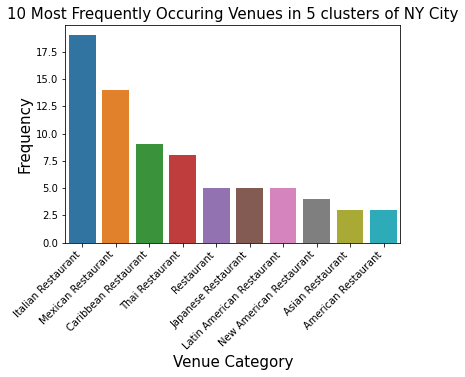

<Figure size 1296x504 with 0 Axes>

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=NY_Resteraunts_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 5 clusters of NY City', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [38]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", NY_Venues_only_restaurant.shape)
NY_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (103, 7)


,Cluster,Cluster Latitude,Cluster Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Cluster 0,40.734036,-73.966889,Smør,40.729295,-73.981521,Scandinavian Restaurant
2,Cluster 0,40.734036,-73.966889,Cafe Mogador,40.719788,-73.960066,Moroccan Restaurant
3,Cluster 0,40.734036,-73.966889,Suki Curry,40.727157,-73.986134,Japanese Restaurant
4,Cluster 0,40.734036,-73.966889,Upstate Craft Beer and Oyster Bar,40.726331,-73.986453,Seafood Restaurant
5,Cluster 0,40.734036,-73.966889,Lilia,40.717572,-73.952282,Italian Restaurant
6,Cluster 0,40.734036,-73.966889,Fish Cheeks,40.725861,-73.992533,Thai Restaurant
7,Cluster 0,40.734036,-73.966889,Wayla,40.718291,-73.992584,Thai Restaurant
8,Cluster 0,40.734036,-73.966889,CAVA,40.721928,-73.996512,Mediterranean Restaurant
9,Cluster 0,40.734036,-73.966889,Thai Diner,40.720739,-73.995631,Thai Restaurant
10,Cluster 0,40.734036,-73.966889,Joseph Leonard,40.733681,-74.001767,New American Restaurant


In [39]:
NY_Venues_restaurant = NY_Venues_only_restaurant.groupby(['Cluster'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [40]:
NY_Venues_restaurant

Cluster
Cluster 0    12
Cluster 1    27
Cluster 2    20
Cluster 3    26
Cluster 4    18
Name: Venue Category, dtype: int64

In [41]:
NY_Venues_restaurant_df  = NY_Venues_restaurant.to_frame().reset_index()
NY_Venues_restaurant_df.columns = ['Cluster #', 'Number of Restaurants']
NY_Venues_restaurant_df.index = np.arange(1, len(NY_Venues_restaurant_df)+1)
list_rest_no =NY_Venues_restaurant_df['Number of Restaurants'].to_list()
list_dist =NY_Venues_restaurant_df['Cluster #'].to_list()
NY_Venues_restaurant_df

,Cluster #,Number of Restaurants
1,Cluster 0,12
2,Cluster 1,27
3,Cluster 2,20
4,Cluster 3,26
5,Cluster 4,18


In [52]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Neighborhood'] = NY_Venues_only_restaurant['Cluster'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

NY_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Austrian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Moroccan Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Cluster 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Cluster 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Cluster 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cluster 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Cluster 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# New dataframe size.
NY_onehot.shape

(103, 31)

In [182]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().round(3).reset_index()
NY_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Austrian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Moroccan Restaurant,New American Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Sushi Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Cluster 0,0.000,0.083,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.167,0.083,0.000,0.083,0.000,0.083,0.083,0.000,0.000,0.083,0.083,0.000,0.000,0.250,0.000,0.000
1,Cluster 1,0.037,0.000,0.000,0.000,0.222,0.000,0.000,0.00,0.037,0.000,0.000,0.037,0.074,0.037,0.037,0.037,0.000,0.000,0.148,0.000,0.000,0.000,0.037,0.000,0.037,0.037,0.037,0.111,0.074,0.000
2,Cluster 2,0.000,0.050,0.000,0.000,0.000,0.050,0.000,0.05,0.000,0.000,0.050,0.000,0.000,0.050,0.400,0.100,0.050,0.000,0.050,0.000,0.050,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Cluster 3,0.077,0.038,0.038,0.038,0.115,0.077,0.000,0.00,0.000,0.038,0.000,0.000,0.000,0.000,0.038,0.038,0.038,0.000,0.115,0.000,0.077,0.038,0.077,0.000,0.000,0.000,0.038,0.077,0.000,0.038
4,Cluster 4,0.000,0.000,0.000,0.000,0.000,0.000,0.056,0.00,0.000,0.000,0.056,0.000,0.000,0.000,0.389,0.000,0.167,0.000,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [90]:
NY_grouped.shape

(5, 31)

In [183]:
num_top_venues = 5

for hood in NY_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NY_grouped[NY_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    dfTEST = pd.DataFrame(data=temp)
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----Cluster 0----
                     venue   freq
0          Thai Restaurant  0.250
1       Italian Restaurant  0.167
2      Japanese Restaurant  0.083
3       Seafood Restaurant  0.083
4  Scandinavian Restaurant  0.083


----Cluster 1----
                           venue   freq
0           Caribbean Restaurant  0.222
1             Mexican Restaurant  0.148
2                Thai Restaurant  0.111
3               Greek Restaurant  0.074
4  Vegetarian / Vegan Restaurant  0.074


----Cluster 2----
                     venue  freq
0       Italian Restaurant  0.40
1      Japanese Restaurant  0.10
2               Restaurant  0.10
3     Fast Food Restaurant  0.05
4  New American Restaurant  0.05


----Cluster 3----
                  venue   freq
0  Caribbean Restaurant  0.115
1    Mexican Restaurant  0.115
2   American Restaurant  0.077
3       Thai Restaurant  0.077
4    Chinese Restaurant  0.077


----Cluster 4----
                       venue   freq
0         Italian Restaurant  0.389
1 

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [180]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Cologne_grouped['Neighborhood']

for ind in np.arange(Cologne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cologne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Cluster 0,Thai Restaurant,Italian Restaurant,Scandinavian Restaurant,Japanese Restaurant,Mediterranean Restaurant
1,Cluster 1,Caribbean Restaurant,Mexican Restaurant,Thai Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant
2,Cluster 2,Italian Restaurant,Restaurant,Japanese Restaurant,Indian Restaurant,Latin American Restaurant
3,Cluster 3,Caribbean Restaurant,Mexican Restaurant,American Restaurant,Thai Restaurant,Restaurant
4,Cluster 4,Italian Restaurant,Mexican Restaurant,Latin American Restaurant,Cuban Restaurant,Fast Food Restaurant
